In [33]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [59]:
data, label = datasets.make_classification(n_samples = 1000, n_classes = 2, random_state = 3, n_clusters_per_class = 1, 
                                           n_features = 2, n_informative = 2, n_redundant = 0)

In [60]:
print(data.shape, label.shape)

(1000, 2) (1000,)


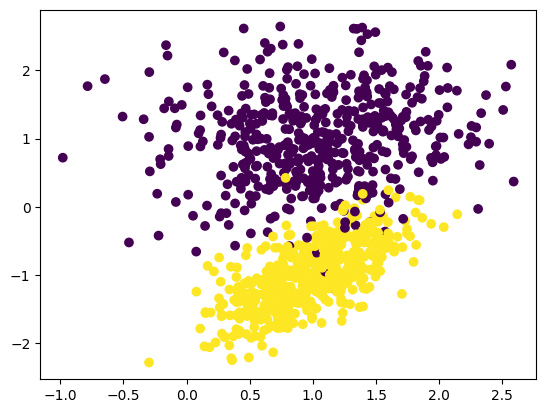

In [61]:
plt.scatter(data[:, 0], data[:, 1], c = label)

In [62]:
np.unique(label)

array([0, 1])

In [63]:
label[label == 0] = -1

In [64]:
np.unique(label)

array([-1,  1])

In [83]:
class SVM:
    
    def __init__(self, c = 0.03):
        self.C = c
        self.W = 0
        self.B = 0
        
    def hingeloss(self, W, b, X, Y):
        loss = 0.5 * np.dot(W, W.T)
        
        for i in range(X.shape[0]):
            ji = Y[i] * (np.dot(W, X[i]) + b)
            loss += self.C * max(0, 1 - ji)
        
        return loss[0][0]
    
    def gradient_descent(self, X, Y, epochs = 1000, lr_rate = 0.003, batch_size = 100):
        
        w = np.zeros((1, X.shape[1]))
        b = 0
#         h_loss = hingeloss(w, b, X, Y)
        loss = []
#         loss.append(h_loss)
        
        for epoch in range(epochs):
            ids = np.arange(X.shape[0])
            np.random.shuffle(ids)
            loss.append(self.hingeloss(w, b, X, Y))
            
            for batch in range(int(X.shape[0]/batch_size)):
                
                grad_w = 0
                grad_b = 0
                
                for j in range(batch * batch_size, (batch + 1) * batch_size):
                    j = ids[j]
                    
                    ji = Y[j] * (np.dot(w, X[j]) + b)
                    if ji >= 1:
                        grad_b += 0
                        grad_w += 0
                        
                    else:
                        grad_w += self.C * Y[j] * X[j]
                        grad_b += self.C * Y[j]
                        
                w = w - lr_rate * w + lr_rate * grad_w
                b = b + lr_rate * grad_b
                
        self.W = w
        self.B = b
        return w, b, loss

In [84]:
svm = SVM()
w, b, loss = svm.gradient_descent(data, label)

In [85]:
print(loss)

[30.00000000000038, 27.33917428761135, 24.763680302648233, 22.271440156231492, 19.859900985742517, 17.563821151424712, 15.582544776640093, 13.9427709516408, 12.650797332531958, 11.664036333673995, 10.914542706902555, 10.349181875712903, 9.923911398250704, 9.586120600539802, 9.336336381249389, 9.130696243177761, 8.968512046363571, 8.828475016699278, 8.71705658903541, 8.622327905648698, 8.538757315046762, 8.467984126303367, 8.40421633926424, 8.346922582410878, 8.292542992585265, 8.245583569485525, 8.200990393713607, 8.159940179880197, 8.12286601892162, 8.087210040797002, 8.054768191258297, 8.025951441776671, 8.004336065367774, 7.97987298370486, 7.9623915454021885, 7.947299478735496, 7.932579520957487, 7.91915265496602, 7.905226662578501, 7.892587913248628, 7.880244121497028, 7.869890139937605, 7.860741249611942, 7.852750730414466, 7.845989273579096, 7.839305821093716, 7.831962705790348, 7.825871973932898, 7.8239475311440945, 7.8204066610127025, 7.816106923861471, 7.8120907942748925, 7.80

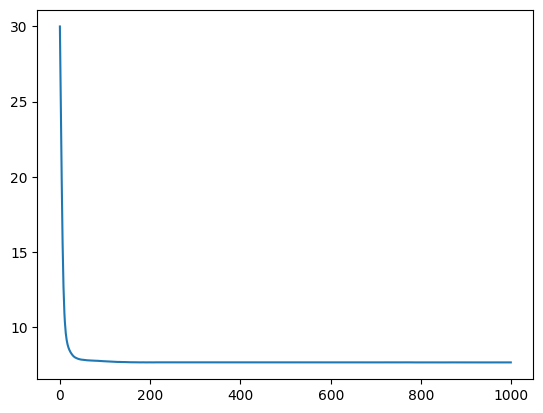

In [86]:
plt.plot(loss)

In [87]:
print(w, b)

[[ 0.11506833 -0.94544573]] -0.1248300000000007


In [88]:
def visualise(w1, w2, b):
    x = np.arange(-1, 4)
    y = -(w1 * x + b)/w2
    
    support_vec_1 = -(w1 * x + b + 1)/w2
    support_vec_2 = -(w1 * x + b - 1)/w2
    
    plt.plot(x, y)
    plt.plot(x, support_vec_1)
    plt.plot(x, support_vec_2)
    plt.scatter(data[:, 0], data[:, 1], c = label)

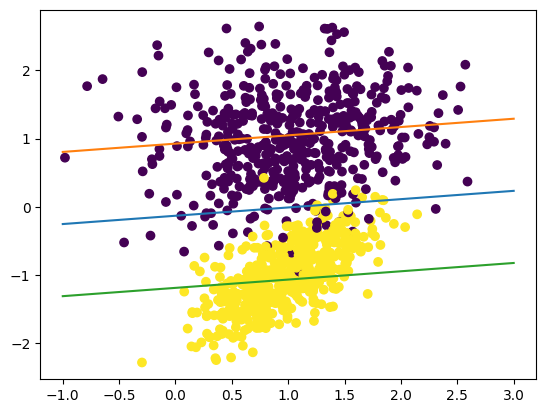

In [89]:
visualise(w[0][0], w[0][1], b)